# pip vs Conda

* [The starting point: which kind of dependencies?](#The-starting-point:-which-kind-of-dependencies?)
* [Pip: Python libraries only](#Pip:-Python-libraries-only)
* [Conda: Any dependency can be a Conda package (almost)](#Conda:-Any-dependency-can-be-a-Conda-package-(almost))
    * [Why Conda packages everything](#Why-Conda-packages-everything)
* [Beyond pure Python: Packaging compiled extensions](#Beyond-pure-Python:-Packaging-compiled-extensions)
    * [Solution #1: Compile it yourself](#Solution-#1:-Compile-it-yourself)
    * [Solution #2: Pip wheels](#Solution-#2:-Pip-wheels)
    * [Solution #3: Conda packages](#Solution-#3:-Conda-packages)
    * [Summary: pip vs Conda](#Summary:-pip-vs-Conda)
* [PyPI vs. Conda-Forge](#PyPI-vs.-Conda-Forge)

>  a **package** is a module that can be added to any program to add additional options, features, or functionality.
also you can call that **module or library**

If you’re using Python in the world of data science or scientific computing, you will soon discover that Python has two different packaging systems: 

**pip and Conda**. Which raises some questions:

* How are they different?
* What are the tradeoffs between the two?
* Which should you use?

but first how to use pip and conda in jupyter :

In [8]:
!pip install numpy

In [9]:
!conda install numpy

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.



## The starting point: which kind of dependencies?

The fundamental difference between pip and Conda packaging is what they put in packages.

* **Pip packages are Python libraries** like NumPy or matplotlib.
* Conda packages include **Python libraries** (NumPy or matplotlib), C libraries (libjpeg), and **executables** (like C compilers, and even the Python interpreter itself).

## Pip: Python libraries only
For example, let’s say you want to install Python 3.9 with NumPy, Pandas, and the gnuplot rendering tool, a tool that is unrelated to Python. Here’s what the pip ``requirements.txt`` would look like:

how to install requirements: 

In [ ]:
pip install -r requrments.txt

## Conda: Any dependency can be a Conda package (almost)

With Conda, Python and gnuplot are just more Conda packages, no different than NumPy or Pandas. The ``environment.yml`` that corresponds (somewhat) to the requirements.txt we saw above will include all of these packages:

## Why Conda packages everything
Why did Conda make the decision to package everything, Python interpreter included? How does this benefit you? In part it’s about portability and reproducibility.

* **Portability across operating systems:** Instead of installing Python in three different ways on Linux, macOS, and Windows, you can use the same environment.yml on all three.
* **Reproducibility:** It’s possible to pin almost the whole stack, from the Python interpreter upwards.
* **Consistent configuration:** You don’t need to install system packages and Python packages in two different ways; (almost) everything can go in one file, the environment.yml.
But it also addresses another problem: how to deal with Python libraries that require compiled code. That’s a big enough topic that it gets a whole new section, next.

## Beyond pure Python: Packaging compiled extensions
In the early days of Python packaging, a package included just the source code that needed to be installed. For pure Python packages, this worked fine, and still does. But what happens when you need to compile some Rust or C or C++ or Fortran code as part of building the package?

* ## Solution #1: Compile it yourself
The original solution was to have each user compile the code themselves at install time. This can be quite slow, wastes resources, is often painful to configure, and still doesn’t solve a big part of the problem: shared library dependencies.

The Pillow image graphics library, for example, relies on third party shared libraries like libpng and libjpeg. In order to compile Pillow yourself, you have to install all of them, plus their development headers. On Linux or macOS you can install the system packages or the Homebrew packages; for Windows this can be more difficult. But you’re going to have to write different configuration for every single OS and even Linux distribution.

* ## Solution #2: Pip wheels
The way pip solves this problem is with packages called “wheels” that can include compiled code. In order to deal with shared library dependencies like libpng, any shared library external dependencies get bundled inside the wheel itself.

For example, let’s look at a Pillow wheel for Linux; a wheel is just a ZIP file so we can use standard ZIP tools:

The wheel includes both Python code, a compiled Python extension, and third-party shared libraries like libpng and libjpeg. This can sometimes make packages larger, as multiple copies of third-party shared libraries may be installed, one per wheel.

* ## Solution #3: Conda packages


Conda packages take a different approach to third-party shared libraries. libjpeg and libpng are packaged as additional Conda packages:

## Summary: pip vs Conda

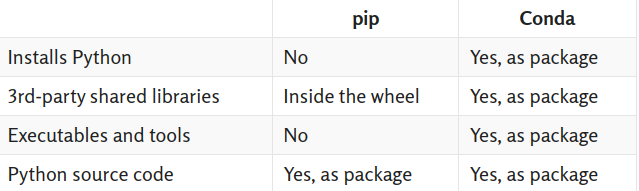

## PyPI vs. Conda-Forge


Another fundamental difference between pip and Conda is less about the tools themselves, and more about the package repositories they rely on and how they work. In particular, most Python programs will rely on open source libraries, and these need to be downloaded from somewhere. For these, pip relies on PyPI, whereas Conda supports multiple different “channels” hosted on Anaconda.

The default Conda channel is maintained by Anaconda Inc, the company that created Conda. It tends to have limited package selection and be somewhat less up-to-date, with some potential benefits regarding stability and GPU support. Beyond that I don’t know that much about it.

But there’s also the Conda-Forge community channel, which packages far more packages, tends to be up-to-date, and is where you probably want to get your Conda packages most of the time. You can mix packages from the default channel and Conda-Forge, if you want the default channel’s GPU packages.

